In [8]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

import os, librosa, audioread, uuid, wave
import numpy as np
from pydub import AudioSegment
from pydub.effects import normalize
from flask import Flask, render_template, jsonify, send_file, url_for
from flask import Flask, request, session
from flask_socketio import SocketIO, emit
from scipy.io.wavfile import read

In [10]:
audio: AudioSegment = AudioSegment.from_file("./static/audio/input-audio-id-1.webm", format='webm')
audio

In [11]:
audio_array = np.array(audio.get_array_of_samples())
audio_array

array([      0,       0,       0, ..., 3811498, 3693001, 4408122],
      dtype=int32)

In [17]:
def plot_speech(audio: np.ndarray | list, sr, length = None):
    length = audio.shape[0] if length is None else length
    duration = length / sr
    time = np.linspace(0, duration, length)

    plt.figure(figsize=(16,4))
    plt.plot(time, audio, linewidth=0.4)
    plt.ylabel('Amplitude')
    plt.xlabel('Time [s]')
    plt.show()

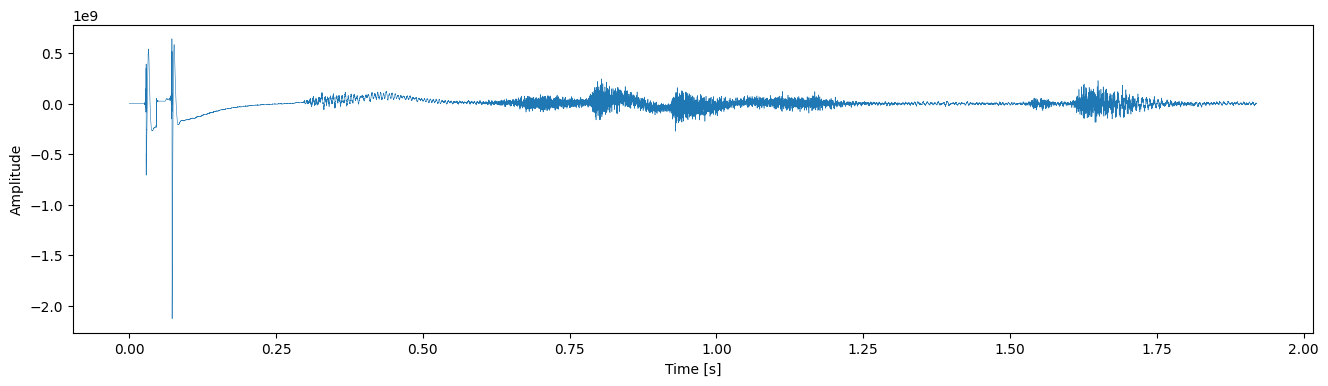

In [19]:
plot_speech(audio_array, audio.frame_rate)

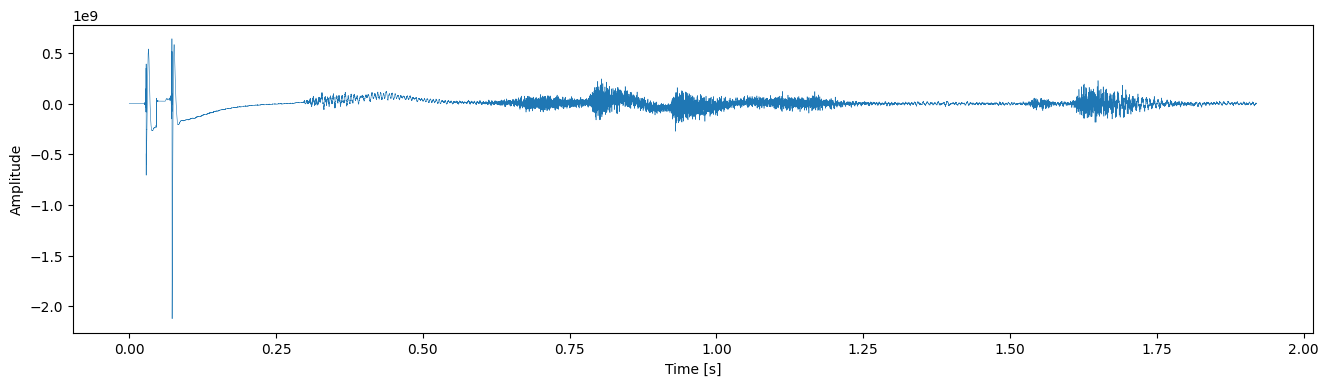

In [23]:
processed_audio_array = np.array(normalize(audio).get_array_of_samples())
plot_speech(processed_audio_array, audio.frame_rate)

In [31]:
np.diff([processed_audio_array, audio_array], axis=0)

array([[    0,     0,     0, ..., 12749, 12353, 14745]], dtype=int32)